<a href="https://colab.research.google.com/github/casanchez25/titanic_spaceship/blob/main/Titanic_spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We wil analyze the Titanic Spaceship dataset, including a predictive model!

# SETUP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle datasets/Titanic spaceship/train.csv')

In [ ]:
df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

- PassengerId - A unique Id for each passenger. Each Id takes the 
form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

# Exploratory Data Analysis

## CRYOSLEEP & VIP

First of all, we are going to verify the Homeplanet of the people

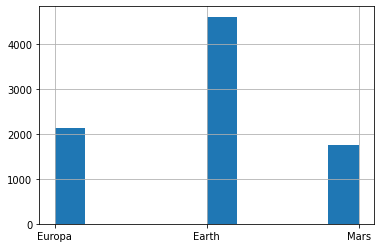

In [ ]:
df['HomePlanet'].hist()

In [ ]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
df['Transported']=df['Transported'].apply(lambda x: 1 if x==True else 0)

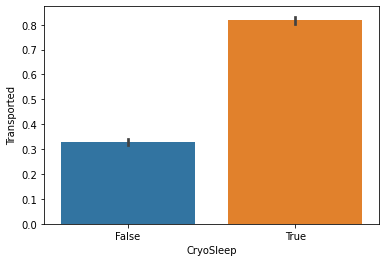

In [ ]:
sns.barplot(data=df, x='CryoSleep', y='Transported')

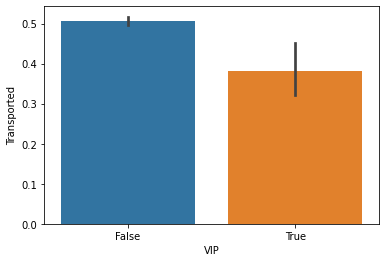

In [ ]:
sns.barplot(data=df, x='VIP', y='Transported')

Most the persons in CryoSleep (80%) were transported, so there is a great correlation with this feature. For VIPs was not hte same case, so we are going apply labels for each feature

In [ ]:
df['CryoSleep']=df['CryoSleep'].apply(lambda x: 3 if x == True else 0)
df['VIP'] = df['VIP'].apply(lambda x: 1 if x == False else 0)

In [ ]:
txt='A/0/S'
txt.split('/')[1]

'0'

In [ ]:
df['Cabin']=df['Cabin'].astype(str)
df['CabinDeck']=df['Cabin'].apply(lambda x: x.split('/')[0])

In [ ]:
df['Cabin_ver']=df['Cabin'].apply(lambda x: len(x))

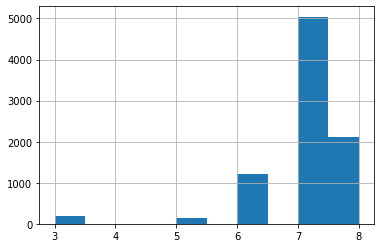

In [ ]:
df['Cabin_ver'].hist()

In [ ]:
cabin_nan= df[df['Cabin_ver']==3]

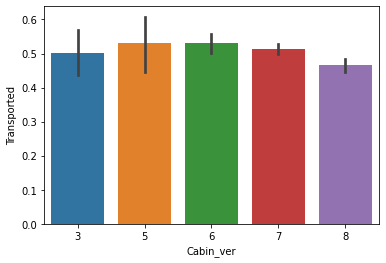

In [ ]:
sns.barplot(data=df, x='Cabin_ver', y='Transported')

The cabin numbers were balanced, so they may not be an indicator

Hypothesis:
1. Would spent money have an correlation with the Home Planet_

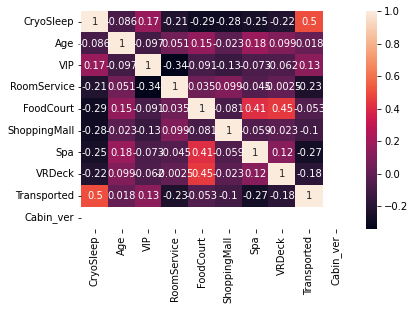

In [ ]:
sns.heatmap(cabin_nan.corr(), annot=True)

In [ ]:
cabin_nan['VIP'].sum()

187

We should verify if there is a correlation between the cabin side or number and the spendings on the Titanic Spaceship

In [ ]:
df['Cabin']=df['Cabin'].astype(str)
df['CabinDeck']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[0])
df['CabinNum']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[1])
df['CabinSide']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[2])

In [ ]:
df['FoodCourt'].fillna(0,inplace=True)
df['RoomService'].fillna(0, inplace=True)
df['ShoppingMall'].fillna(0, inplace=True)
df['Spa'].fillna(0, inplace=True)
df['VRDeck'].fillna(0, inplace=True)

df['Total_spent']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

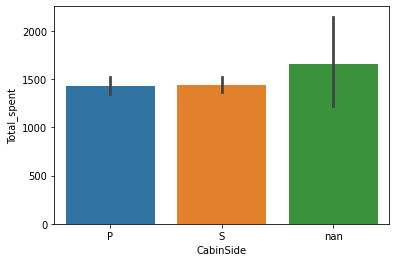

In [ ]:
sns.barplot(data=df, x='CabinSide',y='Total_spent')

(0.0, 5000.0)

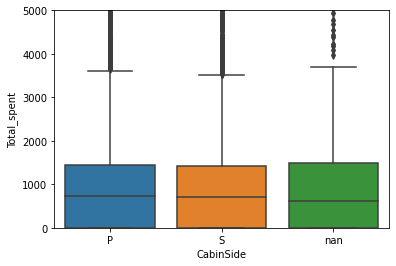

In [ ]:
sns.boxplot(data=df, x='CabinSide',y='Total_spent')
plt.ylim(0,5000)

In [ ]:
df['CabinSide']=df['CabinSide'].apply(lambda x: 'other' if x=='nan' else x)

The Cabin Side didn't had difference between the spent money. Maybe, we can verify what about the home planet, total spent and transported

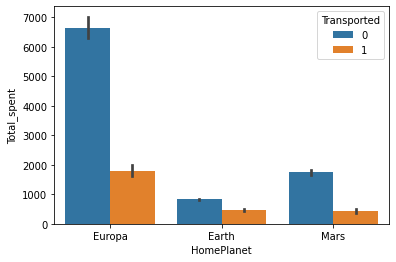

In [ ]:
sns.barplot(data=df, x='HomePlanet',y='Total_spent',hue='Transported')


In [ ]:
df['Name'].fillna('other other', inplace=True)

df['name']=df['Name'].apply(lambda x: x.split(' ')[0])
df['last_name']=df['Name'].apply(lambda x: x.split(' ')[1])

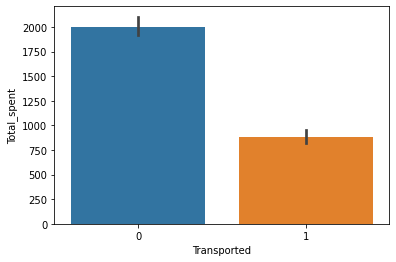

In [ ]:
sns.barplot(data=df, x='Transported',y='Total_spent')

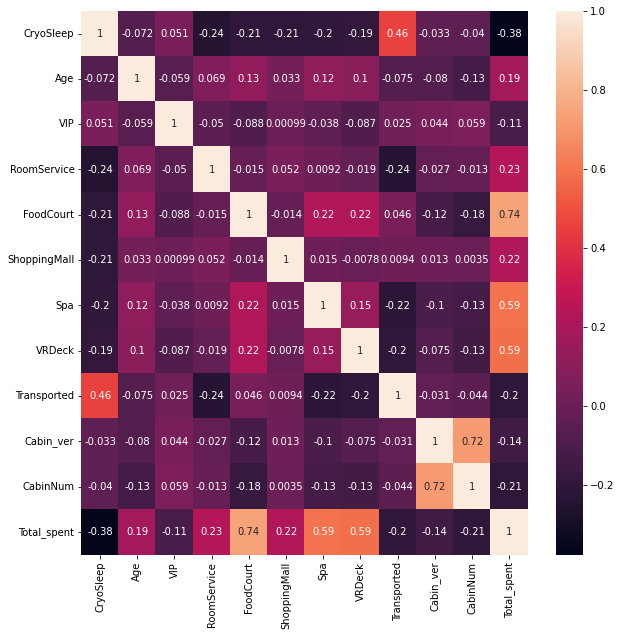

In [ ]:
df['CabinNum']=df['CabinNum'].apply(lambda x: 0 if x=='nan' else x)
df['CabinNum']=df['CabinNum'].astype(int)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
cabin_dict={'other':0, 'P':1,'S':2}
df['CabinSide']=df['CabinSide'].apply(lambda x: cabin_dict.get(x))

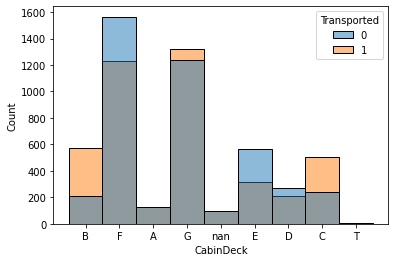

In [ ]:
sns.histplot(data=df, x='CabinDeck', hue='Transported')

In [ ]:
deck_dict={'T':0, 'nan':1,'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
df['CabinDeck']=df['CabinDeck'].apply(lambda x: deck_dict.get(x))

In [ ]:
df.head(2)

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01     Europa          0  B/0/P  TRAPPIST-1e  39.0    1   
1     0002_01      Earth          0  F/0/S  TRAPPIST-1e  24.0    1   

   RoomService  FoodCourt  ShoppingMall  ...  VRDeck             Name  \
0          0.0        0.0           0.0  ...     0.0  Maham Ofracculy   
1        109.0        9.0          25.0  ...    44.0     Juanna Vines   

  Transported  CabinDeck  Cabin_ver  CabinNum  CabinSide  Total_spent    name  \
0           0          6          5         0          1          0.0   Maham   
1           1          7          5         0          2        736.0  Juanna   

   last_name  
0  Ofracculy  
1      Vines  

[2 rows x 21 columns]

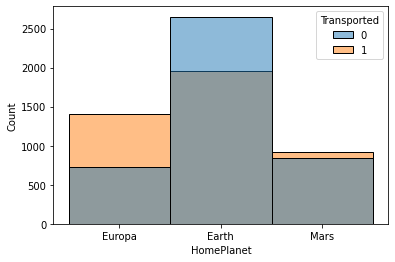

In [ ]:
sns.histplot(data=df, x='HomePlanet',hue='Transported')

## Home Planet and Destination

In [ ]:
df['HomePlanet']=df['HomePlanet'].astype(str)
planets = df['HomePlanet'].unique()
planet_dict={ planets[0] : 3, planets[2]:2, planets[1]:1, 'nan':0}

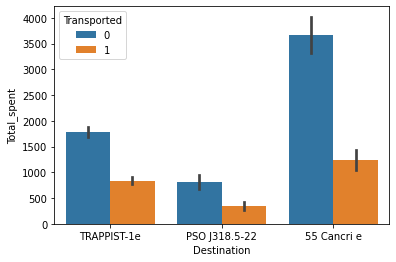

In [ ]:
sns.barplot(data=df, x='Destination',y='Total_spent',hue='Transported')

In [ ]:
planet_dict

{'Earth': 1, 'Europa': 3, 'Mars': 2, 'nan': 0}

In [ ]:
df[df['HomePlanet']== 'nan']

Empty DataFrame
Columns: [HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported, CabinDeck, CabinNum, CabinSide, Total_spent, youth, old, middle_age, child, fam, pass_num, spent0, CabinNum2]
Index: []

[0 rows x 23 columns]

In [ ]:
df['HomePlanet']=df['HomePlanet'].apply(lambda x: planet_dict.get(x))

In [ ]:
df['Destination']=df['Destination'].astype(str)
df[df['Destination']=='nan']

Empty DataFrame
Columns: [HomePlanet, CryoSleep, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported, CabinDeck, CabinNum, CabinSide, Total_spent, youth, old, middle_age, child, fam, pass_num, spent0, CabinNum2]
Index: []

[0 rows x 23 columns]

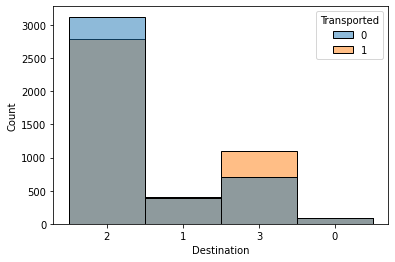

In [ ]:
sns.histplot(data=df, x='Destination', hue='Transported')

We will make a dictionary for destination labeling, based on % of successfully transported

In [ ]:
df['Destination']=df['Destination'].astype(str)
destination = df['Destination'].unique()
dest_dict={ destination[3]:0, destination[1]:1, destination[0]:2, destination[2]:3}
df['Destination']=df['Destination'].apply(lambda x: dest_dict.get(x))

Let's verify if there is a correlation between the age and the transportation. We can create 4 categories

In [ ]:
df['youth']=df['Age'].apply(lambda x: 1 if x<=21 else 0)
df['old']=df['Age'].apply(lambda x: 1 if x>=60 else 0)
df['middle_age']=df['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
df['child']=df['Age'].apply(lambda x:1 if x<12 else 0)


In [ ]:
df

HomePlanet  CryoSleep  Destination       Age  VIP  RoomService  \
0          None          0            2  0.493671    1     0.000000   
1          None          0            2  0.303797    1     0.007608   
2          None          0            2  0.734177    0     0.003001   
3          None          0            2  0.417722    1     0.000000   
4          None          0            2  0.202532    1     0.021149   
...         ...        ...          ...       ...  ...          ...   
8688       None          0            3  0.518987    0     0.000000   
8689       None          3            1  0.227848    1     0.000000   
8690       None          0            2  0.329114    1     0.000000   
8691       None          0            3  0.405063    1     0.000000   
8692       None          0            2  0.556962    1     0.008795   

      FoodCourt  ShoppingMall       Spa    VRDeck  ...  CabinSide  \
0      0.000000      0.000000  0.000000  0.000000  ...          1   
1      0.000302      0.001064  0.024500  0.001823  ...          2   
2      0.119948      0.000000  0.299670  0.002030  ...          2   
3      0.043035      0.015793  0.148563  0.007997  ...          2   
4      0.002348      0.006428  0.025214  0.000083  ...          2   
...         ...           ...       ...       ...  ...        ...   
8688   0.228726      0.000000  0.073322  0.003066  ...          1   
8689   0.000000      0.000000  0.000000  0.000000  ...          2   
8690   0.000000      0.079687  0.000045  0.000000  ...          2   
8691   0.035186      0.000000  0.015753  0.134049  ...          2   
8692   0.157247      0.000000  0.000000  0.000497  ...          2   

      Total_spent  youth  old  middle_age  child       fam  pass_num  spent0  \
0        0.000000      1    0           0      1  0.000000         1       1   
1        0.020452      1    0           0      1  0.000108         1       0   
2        0.288521      1    0           0      1  0.000216         1       0   
3        0.143830      1    0           0      1  0.000216         2       0   
4        0.030317      1    0           0      1  0.000323         1       0   
...           ...    ...  ...         ...    ...       ...       ...     ...   
8688     0.237197      1    0           0      1  0.999569         1       0   
8689     0.000000      1    0           0      1  0.999784         1       1   
8690     0.052047      1    0           0      1  0.999892         1       0   
8691     0.128852      1    0           0      1  1.000000         1       0   
8692     0.134104      1    0           0      1  1.000000         2       0   

      CabinNum2  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
8688          1  
8689          0  
8690          0  
8691          0  
8692          0  

[8693 rows x 23 columns]

We will verify if age gaps works

In [ ]:
df_age=df[['Transported','youth','middle_age','old','child']]
df_age.corr()  

Transported     youth  middle_age       old     child
Transported     1.000000  0.069314   -0.079080 -0.012186  0.121599
youth           0.069314  1.000000   -0.804732 -0.117889  0.457138
middle_age     -0.079080 -0.804732    1.000000 -0.247246 -0.442698
old            -0.012186 -0.117889   -0.247246  1.000000 -0.053891
child           0.121599  0.457138   -0.442698 -0.053891  1.000000

In [ ]:
df_age

Transported  youth  middle_age  old  child
0               0      0           1    0      0
1               1      0           1    0      0
2               0      0           1    0      0
3               0      0           1    0      0
4               1      1           0    0      0
...           ...    ...         ...  ...    ...
8688            0      0           1    0      0
8689            0      1           0    0      0
8690            1      0           1    0      0
8691            0      0           1    0      0
8692            1      0           1    0      0

[8693 rows x 5 columns]

In [ ]:
df_age=pd.melt(df_age, id_vars=['Transported'], value_vars=['youth','middle_age','old'])


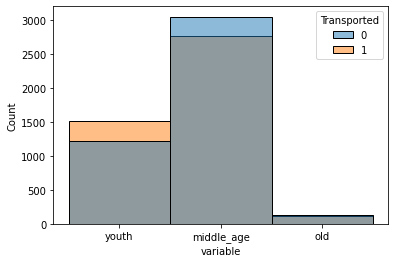

In [ ]:
df_age=df_age[df_age['value']==1]
sns.histplot(data=df_age, x='variable', hue='Transported')

We can observer that youth people and middle_age had more successfull transported than the others

We are going to verify the groups of passengers (family)

In [ ]:
df['fam']=df['PassengerId'].apply(lambda x: x.split('_')[0])
df['pass_num']=df['PassengerId'].apply(lambda x: x.split('_')[1])
df['pass_num']=df['pass_num'].astype(int)

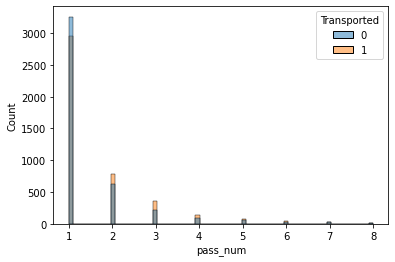

In [ ]:
sns.histplot(data=df, x='pass_num', hue='Transported')

In [ ]:
plt.figure(figsize=(30,30))
df['fam']=df['fam'].astype(int)
#sns.pointplot(data=df, x='fam', y='pass_num', hue='Transported')
#sns.pairplot(data=df, hue='Transported')

<Figure size 2160x2160 with 0 Axes>

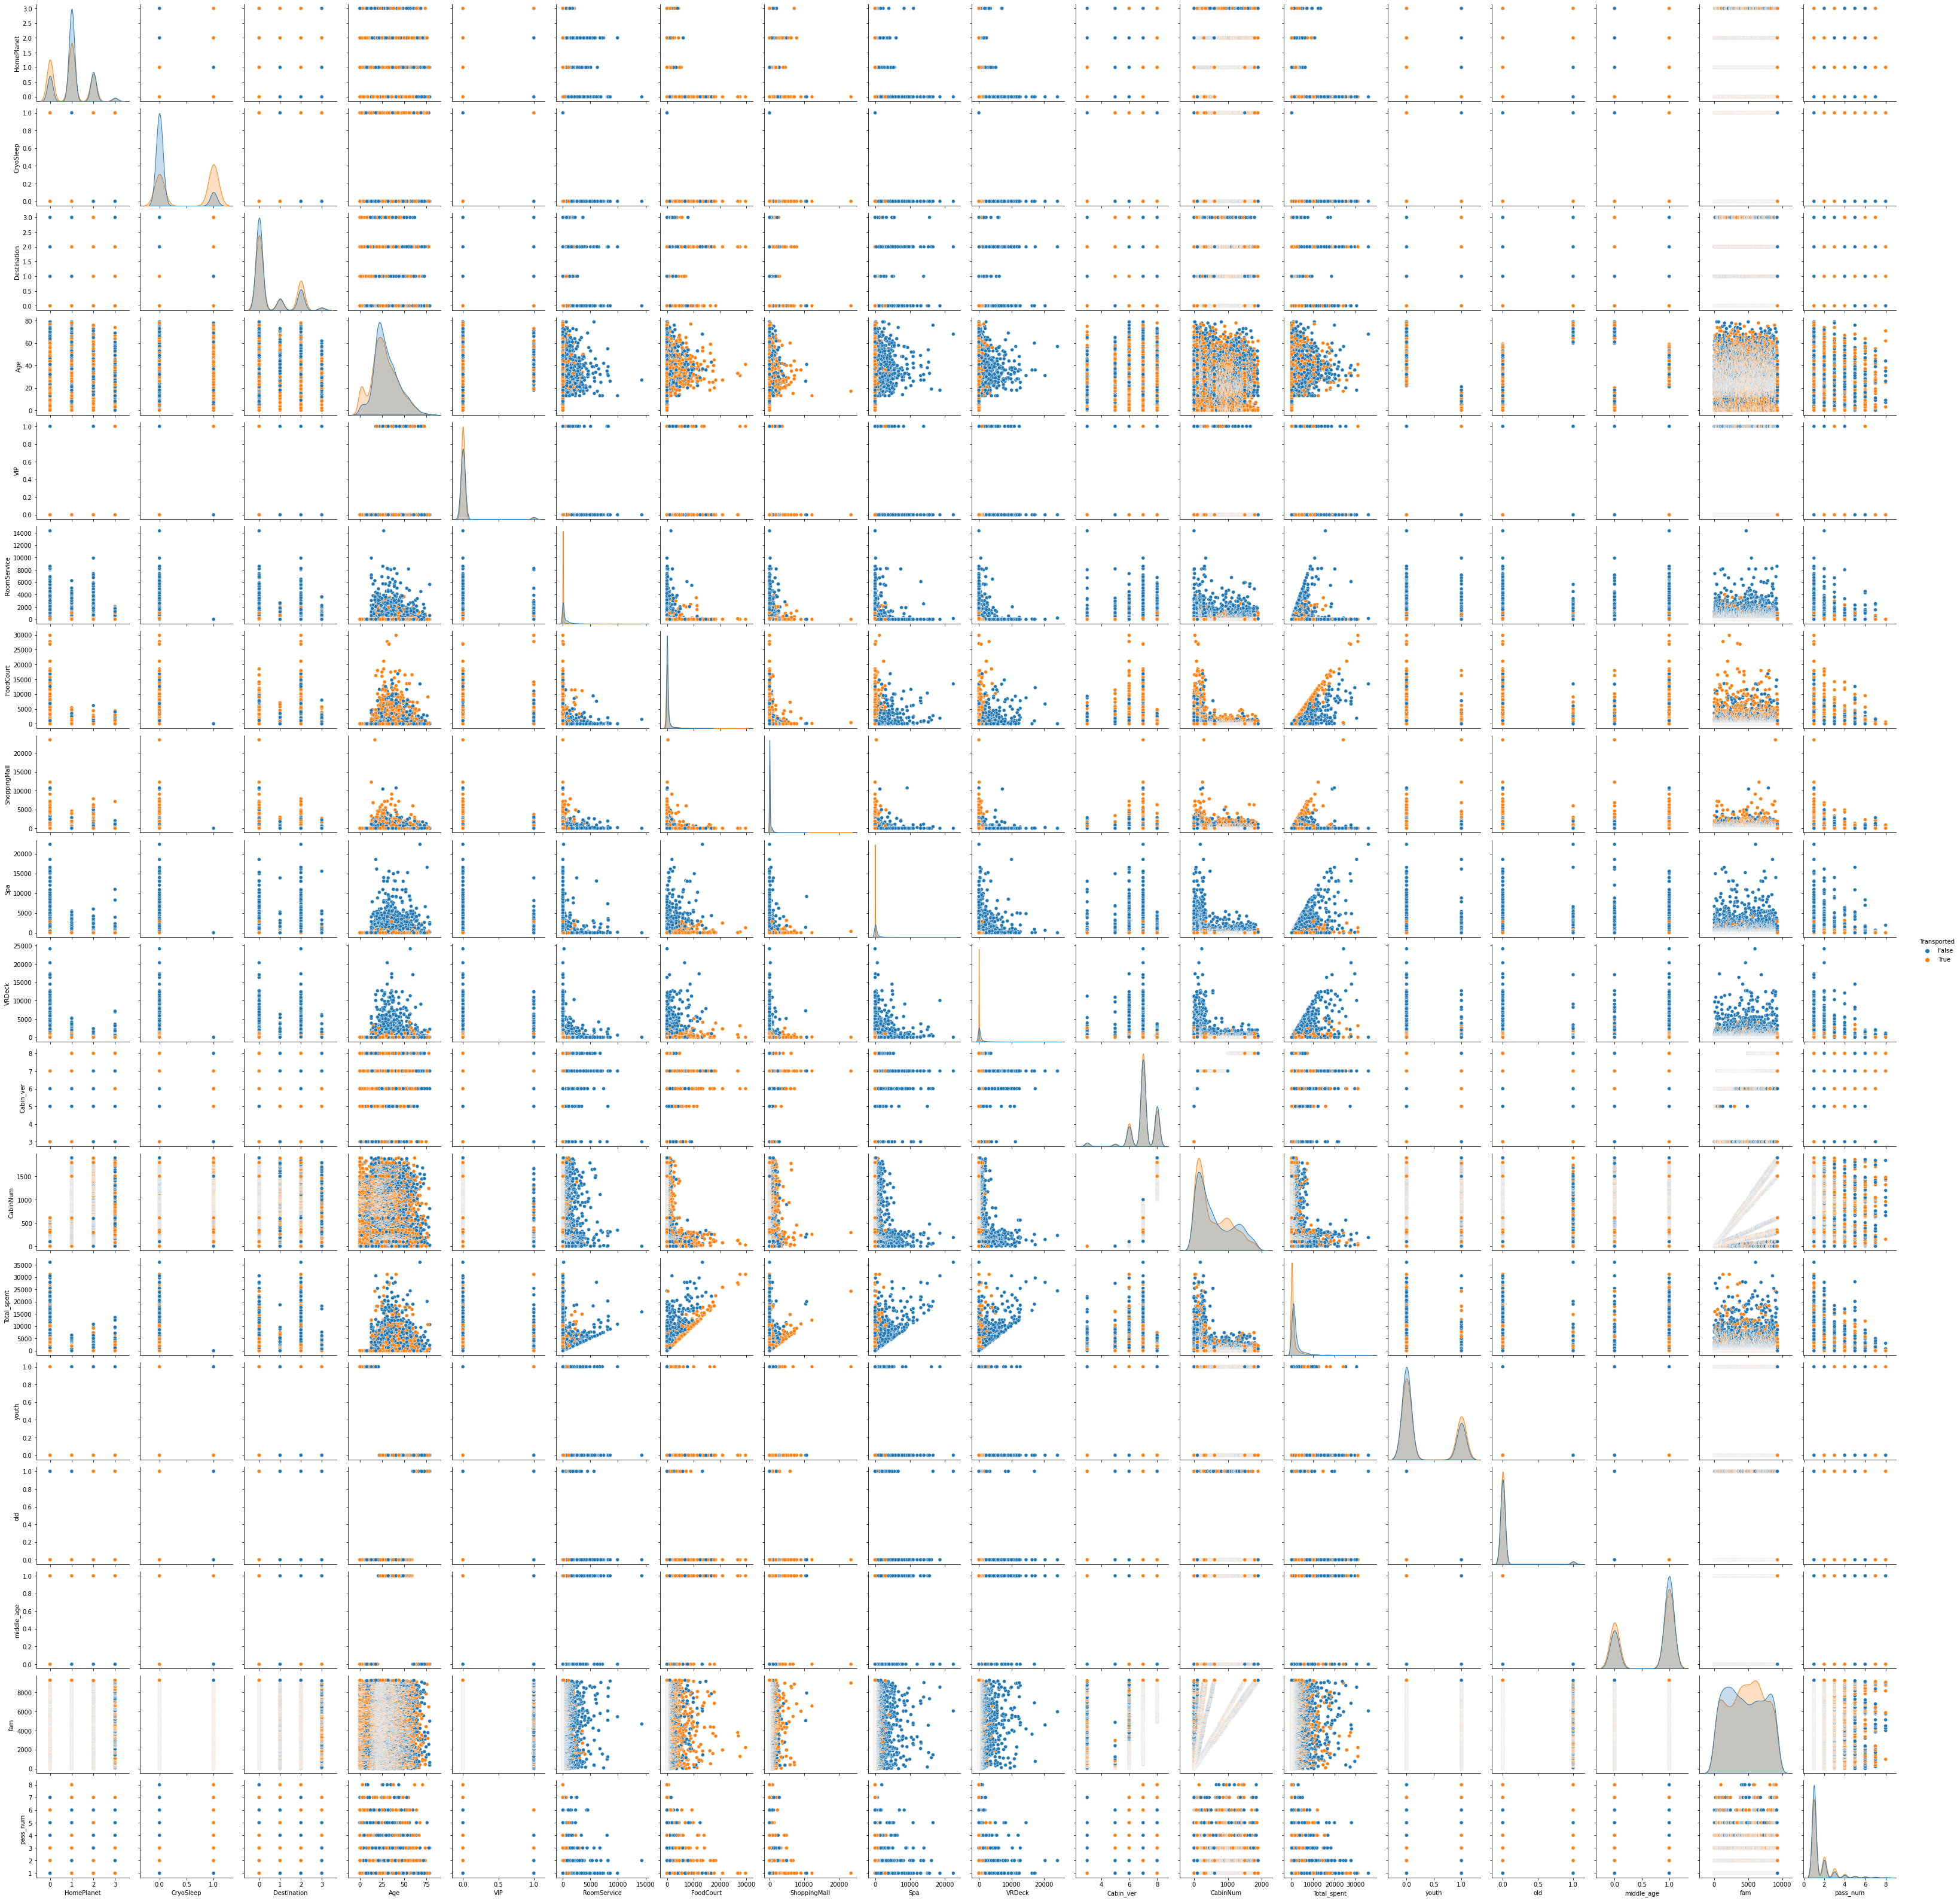

In [ ]:
df['one']=1
fam_spent=df.groupby(['last_name','Transported'])[['one','Total_spent']].agg({np.sum,np.mean})

In [ ]:
fam_spent.drop('other', axis=0, inplace=True)

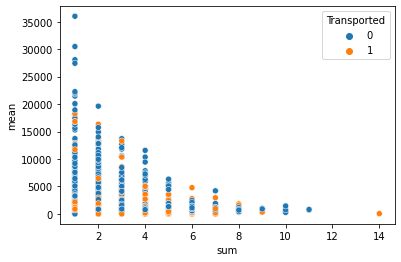

In [ ]:
sns.scatterplot(data=fam_spent, x=fam_spent['one']['sum'], y=fam_spent['Total_spent']['mean'], hue='Transported')

In [ ]:
df[df['last_name']=='Domington']

PassengerId  HomePlanet  CryoSleep     Cabin  Destination   Age  VIP  \
3058     3301_01           1          3   G/525/S            3   8.0    1   
3059     3301_02           1          0   G/525/S            2   1.0    1   
3060     3301_03           1          0   G/525/S            3   0.0    1   
3061     3301_04           1          0   G/525/S            2  20.0    1   
4556     4847_01           1          0   F/917/S            2  19.0    1   
5441     5812_01           1          3   G/943/S            2   0.0    1   
5442     5812_02           1          0   G/943/S            2   3.0    1   
5443     5812_03           1          3   G/943/S            2  12.0    1   
5444     5812_04           1          3   G/943/S            2   2.0    1   
5445     5812_05           1          3   G/943/S            2  41.0    1   
5446     5812_06           1          3   G/943/S            3  11.0    1   
6101     6444_01           1          0  G/1041/P            2  19.0    1   
6102     6444_02           1          3  G/1041/P            2   0.0    1   
6771     7152_01           1          0  G/1167/S            2   8.0    1   
6772     7152_02           1          3  G/1167/S            1  49.0    1   

      RoomService  FoodCourt  ShoppingMall  ...  Total_spent    name  \
3058          0.0        0.0           0.0  ...          0.0    Tyle   
3059          0.0        0.0           0.0  ...          0.0  Tonald   
3060          0.0        0.0           0.0  ...          0.0  Yolace   
3061          0.0        0.0           0.0  ...          0.0   Lulah   
4556          0.0        0.0         699.0  ...        803.0  Blancy   
5441          0.0        0.0           0.0  ...          0.0   Holey   
5442          0.0        0.0           0.0  ...          0.0   Garry   
5443          0.0        0.0           0.0  ...          0.0  Evaned   
5444          0.0        0.0           0.0  ...          0.0   Ireen   
5445          0.0        0.0           0.0  ...          0.0    Dian   
5446          0.0        0.0           0.0  ...          0.0  Karena   
6101          0.0        0.0           0.0  ...          0.0  Sandie   
6102          0.0        0.0           0.0  ...          0.0  Elicey   
6771          0.0        0.0           0.0  ...          0.0  Diandi   
6772          0.0        0.0           0.0  ...          0.0   Royce   

      last_name  youth  old  middle_age  child   fam  pass_num one  
3058  Domington      1    0           0      1  3301         1   1  
3059  Domington      1    0           0      1  3301         2   1  
3060  Domington      1    0           0      1  3301         3   1  
3061  Domington      1    0           0      0  3301         4   1  
4556  Domington      1    0           0      0  4847         1   1  
5441  Domington      1    0           0      1  5812         1   1  
5442  Domington      1    0           0      1  5812         2   1  
5443  Domington      1    0           0      0  5812         3   1  
5444  Domington      1    0           0      1  5812         4   1  
5445  Domington      0    0           1      0  5812         5   1  
5446  Domington      1    0           0      1  5812         6   1  
6101  Domington      1    0           0      0  6444         1   1  
6102  Domington      1    0           0      1  6444         2   1  
6771  Domington      1    0           0      1  7152         1   1  
6772  Domington      0    0           1      0  7152         2   1  

[15 rows x 28 columns]

It seems that Domington was not a powerful family

In [ ]:
highnumcabin=df[df['CabinNum']>500]

In [ ]:
df.head(2)

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01           3          0  B/0/P            2  39.0    1   
1     0002_01           1          0  F/0/S            2  24.0    1   

   RoomService  FoodCourt  ShoppingMall  ...  Total_spent    name  last_name  \
0          0.0        0.0           0.0  ...          0.0   Maham  Ofracculy   
1        109.0        9.0          25.0  ...        736.0  Juanna      Vines   

   youth  old  middle_age  child  fam  pass_num one  
0      0    0           1      0    1         1   1  
1      0    0           1      0    2         1   1  

[2 rows x 28 columns]

(0.0, 5000.0)

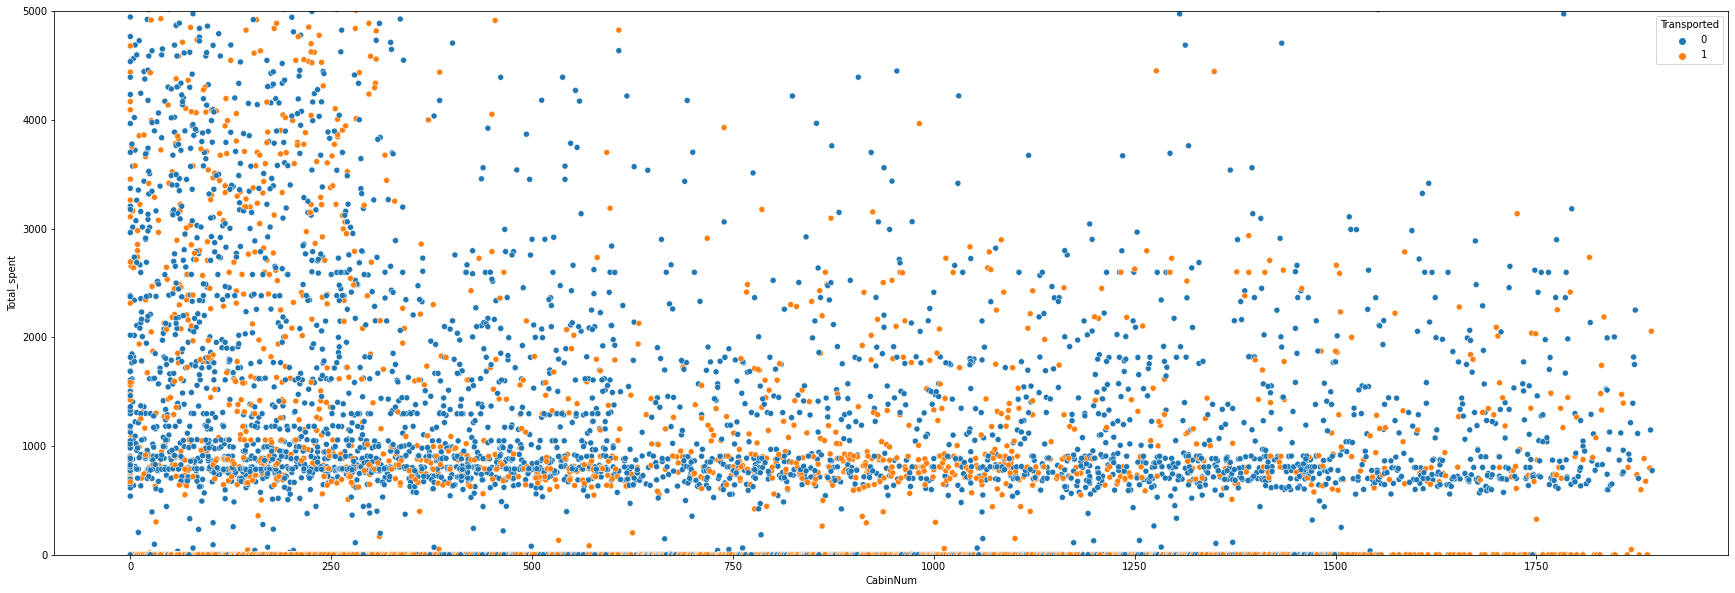

In [ ]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df, x='CabinNum', y='Total_spent', hue='Transported')
plt.ylim(0,5000)
#plt.xlim(0,350)

It seems that people who did not spent money had a better possibilities for transportation, between 0-350 in cabin num had more consumptions and it maybe had a better possibility. Between 900 to 1100 also had a better distribution 

In [ ]:
df['spent0']=df['Total_spent'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
df['CabinNum2']=df['CabinNum'].apply(lambda x: 1 if x< 550 else (2 if x in range(900, 1100) else 0))

In [ ]:
df.head(3)

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01           3          0  B/0/P            2  39.0    1   
1     0002_01           1          0  F/0/S            2  24.0    1   
2     0003_01           3          0  A/0/S            2  58.0    0   

   RoomService  FoodCourt  ShoppingMall  ...  last_name  youth old  \
0          0.0        0.0           0.0  ...  Ofracculy      0   0   
1        109.0        9.0          25.0  ...      Vines      0   0   
2         43.0     3576.0           0.0  ...     Susent      0   0   

   middle_age  child  fam  pass_num  one  spent0 CabinNum2  
0           1      0    1         1    1       1         1  
1           1      0    2         1    1       0         1  
2           1      0    3         1    1       0         1  

[3 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   int64  
 14  CabinDeck     8693 non-null   int64  
 15  Cabin_ver     8693 non-null   int64  
 16  CabinNum      8693 non-null   int64  
 17  CabinSide     8693 non-null   int64  
 18  Total_spent   8693 non-null 

In [ ]:
#fam_spent=df.groupby(['fam'])[['Total_spent']].mean()

In [ ]:
#fam_spent

In [ ]:
#df=df.join(fam_spent['Total_spent'], rsuffix='_mean')
#df['Total_spent_mean'].fillna(0, inplace=True)

In [ ]:
df.drop(columns=['PassengerId','Cabin','Name','last_name','name','one','Cabin_ver'], inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#cols_for_scale= ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spent','fam','Age','CabinNum','Total_spent_mean']
cols_for_scale= ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spent','fam','Age','CabinNum']
scaler=MinMaxScaler()
scaled= scaler.fit_transform(df[cols_for_scale])

In [ ]:
df[cols_for_scale]=scaled

In [ ]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinDeck', 'CabinNum', 'CabinSide', 'Total_spent', 'youth', 'old',
       'middle_age', 'child', 'fam', 'pass_num', 'spent0', 'CabinNum2'],
      dtype='object')

In [ ]:
df['Transported']=df['Transported'].apply(lambda x: 1 if x==True else 0)

# SPLITTING DATA

In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(df.drop(columns=['Transported']), df['Transported'],
                                                                         test_size=.2, random_state=13,
                                                                 shuffle=True)

In [ ]:
val_data.fillna(0,inplace=True)

# LIGHTGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgbm

lgb_params = {'metric': ['mse','mae'],
              'num_leaves': range(7,200),
              'max_bin': range(50,220),
              'bagging_freq': range(3,50),
              
              'n_estimators': range(80,200),
              'reg_lambda':np.linspace(0,1, num=25),
              'learning_rate': np.linspace(0.001,0.2, num=25),
              'feature_fraction': np.linspace(0.001, 0.8, num=25),
              'max_depth': range(20,400),
              
              'boosting_type': ['gbdt', 'dart', 'goss'],
              
              }



In [ ]:
#lgbr = lgbm.LGBMClassifier()
#model = RandomizedSearchCV(lgbr, lgb_params, cv=10, n_iter=20, scoring='accuracy')
#model.fit(train_data, train_labels, eval_set=[(val_data, val_labels)], verbose=0)

In [ ]:
#model.best_params_

In [ ]:
new_params={'bagging_freq': 10,
 'boosting_type': 'dart',
 'feature_fraction': 0.8,
 'learning_rate': 0.08762500000000001,
 'max_bin': 61,
 'max_depth': 42,
 'metric': 'mae',
 'n_estimators': 191,
 'num_leaves': 65,
 'reg_lambda': 0.15789473684210525}

In [ ]:
#model.best_score_

In [ ]:
model2 = lgbm.LGBMClassifier()
#model2.set_params(**model.best_params_)
model2.set_params(**new_params)
model2.fit(train_data, train_labels, eval_set=[(val_data, val_labels),(train_data, train_labels)], verbose=0)

LGBMClassifier(bagging_freq=10, boosting_type='dart', feature_fraction=0.8,
               learning_rate=0.08762500000000001, max_bin=61, max_depth=42,
               metric='mae', n_estimators=191, num_leaves=65,
               reg_lambda=0.15789473684210525)

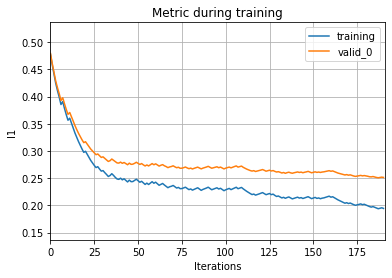

In [ ]:
lgbm.plot_metric(model2)

<Figure size 1440x2160 with 0 Axes>

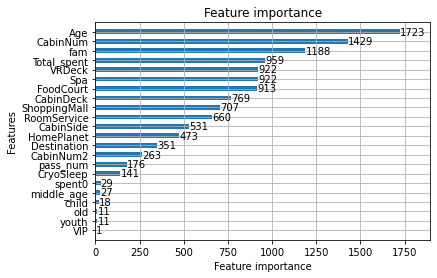

In [ ]:
plt.figure(figsize=(20,30))
lgbm.plot_importance(model2, height= 0.5)

In [ ]:
predicted= model2.predict(val_data)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_labels,predicted)

array([[715, 165],
       [166, 693]])

array([[708, 172],
       [159, 700]])

In [ ]:
from sklearn.metrics import precision_score
precision_score(val_labels,predicted)

0.8076923076923077

# XGBOOST

In [ ]:
from pandas._libs.hashtable import mode
from xgboost import XGBClassifier

xg_params={'booster':['dart', 'gbtree'],
           'eta':np.linspace(0,1,num=25),
           'max_depth': range(6,50)  
}

model= XGBClassifier(booster='dart',eta=0.05, max_depth=10)
model.fit(train_data, train_labels, eval_set=[(val_data, val_labels)])


[0]	validation_0-error:0.223117
[1]	validation_0-error:0.219666
[2]	validation_0-error:0.226567
[3]	validation_0-error:0.211616
[4]	validation_0-error:0.209316
[5]	validation_0-error:0.207016
[6]	validation_0-error:0.207016
[7]	validation_0-error:0.211041
[8]	validation_0-error:0.209891
[9]	validation_0-error:0.20644
[10]	validation_0-error:0.20299
[11]	validation_0-error:0.201265
[12]	validation_0-error:0.200115
[13]	validation_0-error:0.200115
[14]	validation_0-error:0.20184
[15]	validation_0-error:0.20299
[16]	validation_0-error:0.20069
[17]	validation_0-error:0.20299
[18]	validation_0-error:0.203565
[19]	validation_0-error:0.201265
[20]	validation_0-error:0.204715
[21]	validation_0-error:0.20299
[22]	validation_0-error:0.202415
[23]	validation_0-error:0.20299
[24]	validation_0-error:0.201265
[25]	validation_0-error:0.20184
[26]	validation_0-error:0.200115
[27]	validation_0-error:0.20069
[28]	validation_0-error:0.19954
[29]	validation_0-error:0.19724
[30]	validation_0-error:0.197815

XGBClassifier(booster='dart', eta=0.05, max_depth=10)

In [ ]:
pred=model.predict(val_data)
precision_score(val_labels,pred)

0.8061104582843713

In [ ]:
confusion_matrix(val_labels, pred)

array([[715, 165],
       [173, 686]])

# TEST

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/kaggle datasets/Titanic spaceship/test.csv')

In [ ]:
def test_format(df):
  df['CryoSleep']=df['CryoSleep'].apply(lambda x: 3 if x == True else 0)
  df['VIP'] = df['VIP'].apply(lambda x: 1 if x == True else 0)

  df['Cabin']=df['Cabin'].astype(str)
  df['CabinDeck']=df['Cabin'].apply(lambda x: x.split('/')[0])
  #This should not affect
  #df['Cabin_ver']=df['Cabin'].apply(lambda x: len(x))


  df['Cabin']=df['Cabin'].astype(str)
  df['CabinDeck']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[0])
  df['CabinNum']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[1])
  df['CabinSide']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[2])

  df['FoodCourt'].fillna(0,inplace=True)
  df['RoomService'].fillna(0, inplace=True)
  df['ShoppingMall'].fillna(0, inplace=True)
  df['Spa'].fillna(0, inplace=True)
  df['VRDeck'].fillna(0, inplace=True)

  df['Total_spent']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

  df['CabinSide']=df['CabinSide'].apply(lambda x: 'other' if x=='nan' else x)

  df['Name'].fillna('other other', inplace=True)
  df['name']=df['Name'].apply(lambda x: x.split(' ')[0])
  df['last_name']=df['Name'].apply(lambda x: x.split(' ')[1])



  df['CabinNum']=df['CabinNum'].apply(lambda x: 0 if x=='nan' else x)
  df['CabinNum']=df['CabinNum'].astype(int)


  cabin_dict={'other':0, 'P':1,'S':2}
  df['CabinSide']=df['CabinSide'].apply(lambda x: cabin_dict.get(x))

  deck_dict={'T':0, 'nan':1,'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
  df['CabinDeck']=df['CabinDeck'].apply(lambda x: deck_dict.get(x))


  df['HomePlanet']=df['HomePlanet'].astype(str)
  df['HomePlanet']=df['HomePlanet'].apply(lambda x: planet_dict.get(x))
  #df['HomePlanet']=df['HomePlanet'].apply(lambda x: home_dict.get('encoding_item').get(x))
  #df['HomePlanet'].fillna(0,inplace=True)

  df['Destination']=df['Destination'].astype(str)
  df['Destination']=df['Destination'].apply(lambda x: dest_dict.get(x))
  #df['Destination']=df['Destination'].apply(lambda x: dest_dict.get('encoding_item').get(x))
  #df['Destination'].fillna(0,inplace=True)

  df['youth']=df['Age'].apply(lambda x: 1 if x<=21 else 0)
  df['old']=df['Age'].apply(lambda x: 1 if x>=60 else 0)
  df['middle_age']=df['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
  df['child']=df['Age'].apply(lambda x:1 if x<12 else 0)

  df['fam']=df['PassengerId'].apply(lambda x: x.split('_')[0])
  df['pass_num']=df['PassengerId'].apply(lambda x: x.split('_')[1])
  df['pass_num']=df['pass_num'].astype(int)

  df['spent0']=df['Total_spent'].apply(lambda x: 1 if x == 0 else 0)

  #fam_spent=df.groupby(['fam'])[['Total_spent']].mean()
  #df=df.join(fam_spent['Total_spent'], rsuffix='_mean')
  #df['Total_spent_mean'].fillna(0, inplace=True)

  df['CabinNum2']=df['CabinNum'].apply(lambda x: 1 if x< 550 else (2 if x in range(900, 1100) else 0))

  df.drop(columns=['PassengerId','Cabin','Name','last_name','name'], inplace=True)

  scaled= scaler.transform(df[cols_for_scale])

  df[cols_for_scale]=scaled

  return df


In [ ]:
test= test_format(df_test)

In [ ]:
test=test[train_data.columns.to_list()]

In [ ]:
submission=model2.predict(test)

We are going to import the raw test data to match the formatting for Kaggle's submission

In [ ]:
raw_test=pd.read_csv('/content/drive/MyDrive/kaggle datasets/Titanic spaceship/test.csv')

In [ ]:
raw_test['Transported']=submission

In [ ]:
raw_test

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez   
...           ...        ...           ...     ...     ...               ...   
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter   
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron   
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore   
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale   
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley   

      Transported  
0               0  
1               0  
2               1  
3               1  
4               0  
...           ...  
4272            0  
4273            0  
4274            1  
4275            1  
4276            0  

[4277 rows x 14 columns]

In [ ]:
raw_test['Transported']=raw_test['Transported'].apply(lambda x: True if x==1 else False)

In [ ]:
raw_test

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez   
...           ...        ...           ...     ...     ...               ...   
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter   
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron   
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore   
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale   
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley   

      Transported  
0           False  
1           False  
2            True  
3            True  
4           False  
...           ...  
4272        False  
4273        False  
4274         True  
4275         True  
4276        False  

[4277 rows x 14 columns]

In [ ]:
raw_test[['PassengerId','Transported']].to_csv('/content/drive/MyDrive/kaggle datasets/Titanic spaceship/submission.csv', 
                                              index=False)